# Project 1: Navigation

---

This notebook is the report from the project. It uses [dqn-agent.py](/dqn_agent.py) and [model.py](/model.py) as found in this repository. 

Project Overview
For this project, an agent will be trained to navigate (and collect bananas!) in a large, square world.

![navigation](images/bananas.gif)

A reward of +1 is provided for collecting a yellow banana, and a reward of -1 is provided for collecting a blue banana. Thus, the goal of the agent is to collect as many yellow bananas as possible while avoiding blue bananas.

The state space has 37 dimensions and contains the agent's velocity, along with ray-based perception of objects around the agent's forward direction. Given this information, the agent has to learn how to best select actions. Four discrete actions are available, corresponding to:

* 0 - move forward.
* 1 - move backward.
* 2 - turn left.
* 3 - turn right.

The task is episodic, and in order to solve the environment, the agent must get an average score of +13 over 100 consecutive episodes.

Follow the steps outlined in this report to reproduce the results. 

## Exploration of the Udacity environment.

Before training the agent the following steps will help you install the neccessary packages, and explore the environment. 

The project environment is similar to, but not identical to the Banana Collector environment on the [Unity ML-Agents GitHub page](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#banana-collector)

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
# The agent code for this project is defined in dqn_agent.py, that uses model.py
from dqn_agent import Agent

import random
import torch
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
# Load the environment from the file in the repo.
env = UnityEnvironment(file_name="/Users/Sigve/Projects/Udacity/drlnd/project_1_Navigation/Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [5]:
    
# Environments Python API
# The following lines shows and documents important functions of the 
# python API for the environment. 
# ==========

score = 0
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state

action = np.random.randint(action_size)        # select an action
env_info = env.step(action)[brain_name]        # send the action to the environment
next_state = env_info.vector_observations[0]   # get the next state
reward = env_info.rewards[0]                   # get the reward
done = env_info.local_done[0]                  # see if episode has finished
score += reward                                # update the score
state = next_state                             # roll over the state to next time step

## Training the agent

The next section will use the above environment, together with the agent in the drl-agent.py class and model.py class to solve the environment. 

### 1. Instansiate an agent 
The agent is defined in the drl_agent.py file that again uses the model.py. 

In [6]:
# Instansiating an agent from dqn_agent.py class
agent = Agent(state_size=brain.vector_observation_space_size, action_size=brain.vector_action_space_size, seed=0)

###  2. DQN Network

The function below defines the training process where the agent interacts and learns by the environment in 1000 episodes. 

It the function returns an array of all the scores. The code cel also runs the dqn function with the default parameters and plots the scores. 

Episode 100	Average Score: 0.76
Episode 200	Average Score: 4.20
Episode 300	Average Score: 8.11
Episode 400	Average Score: 10.79
Episode 500	Average Score: 12.89
Episode 503	Average Score: 13.02
Environment solved in 403 episodes!	Average Score: 13.02


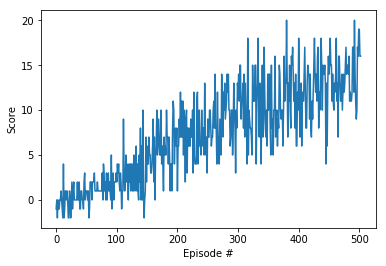

In [7]:
def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    
    
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name] 
            next_state = env_info.vector_observations[0]   
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
            
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

The resulting plot should look like the following: 

![plot from training](images/training_result_plot.png)